In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
(x_train, t_train), (x_test, t_test)=mnist.load_data()

In [6]:
x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)
print(x_train.shape, x_test.shape)
print(t_train.shape, t_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [7]:
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0

In [8]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [11]:
cnn=Sequential()
cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [13]:
cnn.compile(loss='sparse_categorical_crossentropy',
           optimizer=Adam(), metrics=['accuracy'])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

In [14]:
hist=cnn.fit(x_train, t_train, batch_size=128, epochs=30, validation_data=(x_test, t_test))

Epoch 1/30
469/469 [==============================] - 32s 66ms/step - loss: 0.2297 - accuracy: 0.9289 - val_loss: 0.0516 - val_accuracy: 0.9825
Epoch 2/30
469/469 [==============================] - 35s 75ms/step - loss: 0.0819 - accuracy: 0.9750 - val_loss: 0.0406 - val_accuracy: 0.9863
Epoch 3/30
469/469 [==============================] - 38s 81ms/step - loss: 0.0624 - accuracy: 0.9813 - val_loss: 0.0344 - val_accuracy: 0.9884
Epoch 4/30
469/469 [==============================] - 47s 101ms/step - loss: 0.0515 - accuracy: 0.9837 - val_loss: 0.0289 - val_accuracy: 0.9909
Epoch 5/30
469/469 [==============================] - 63s 134ms/step - loss: 0.0442 - accuracy: 0.9859 - val_loss: 0.0326 - val_accuracy: 0.9889
Epoch 6/30
469/469 [==============================] - 68s 146ms/step - loss: 0.0362 - accuracy: 0.9884 - val_loss: 0.0290 - val_accuracy: 0.9908
Epoch 7/30
469/469 [==============================] - 69s 148ms/step - loss: 0.0333 - accuracy: 0.9896 - val_loss: 0.0280 - val_accur

In [15]:
cnn.evaluate(x_test, t_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0348 - accuracy: 0.9930


[0.03482356294989586, 0.9929999709129333]

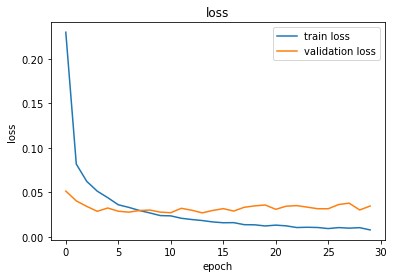

In [18]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

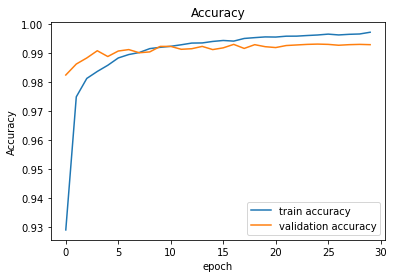

In [19]:
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.show()